In [17]:
# Tensorflow imports
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [42]:
# Keras imports
from keras import optimizers
from keras import models
# from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import adam

Using TensorFlow backend.


In [43]:
import os

# Get current working directory
os.getcwd()

'C:\\Users\\User\\Desktop\\4th_year_AMLS\\AMLS_19-20_ChinYangTan_16053203\\Project_AMLS_19-20_16053203\\Notebook\\B2'

In [44]:
import pandas as pd

# Read dataset
df = pd.read_csv('../../Dataset_original_AMLS_19-20/cartoon_set/labels.csv', sep = '\t')

# Keep eye_color and file_name columns
df = df.drop(columns = [df.columns[0], df.columns[2]])

# Set eye_color as string variables
df['eye_color'] = df.loc[:, 'eye_color'].apply(str)

In [45]:
df

eye_color file_name
0            1     0.png
1            2     1.png
2            2     2.png
3            2     3.png
4            0     4.png
...        ...       ...
9995         3  9995.png
9996         0  9996.png
9997         1  9997.png
9998         0  9998.png
9999         2  9999.png

[10000 rows x 2 columns]

In [46]:
import numpy as np

# Split dataframe into training and validation sets
training, validating = np.split(df.sample(frac = 1), [int(0.9 * len(df)), ])

In [47]:
# Image folder
img = '../../Dataset_original_AMLS_19-20/cartoon_set/img'

In [48]:
# Set up data generator
data_generator = ImageDataGenerator(
    rescale = 1./255,
    validation_split = 0.2,
    horizontal_flip = True,
    vertical_flip = True
)

In [49]:
# Data generator variables
x_col = 'file_name'
y_col = 'eye_color'
class_mode = 'categorical'
target_size = (30, 30)
batch_size = 24
subset = 'training'

# Dictionary to keep training and validation generators
generators = {}

In [50]:
# Get batches of training dataset from the dataframe
print("Training Dataset Preparation: ")
generators['training'] = data_generator.flow_from_dataframe(
    dataframe = training,
    directory = img,
    x_col = x_col,
    y_col = y_col,
    class_mode = class_mode,
    target_size = target_size,
    batch_size = batch_size,
    subset = subset
)

Training Dataset Preparation: 
Found 7200 validated image filenames belonging to 5 classes.


In [51]:
# Get batches of validation dataset from the dataframe
print("Validation Dataset Preparation: ")
generators['validation'] = data_generator.flow_from_dataframe(
    dataframe = validating,
    directory = img,
    x_col = x_col,
    y_col = y_col,
    class_mode = class_mode,
    target_size = target_size,
    batch_size = batch_size,
    subset = subset
)

Validation Dataset Preparation: 
Found 800 validated image filenames belonging to 5 classes.


In [86]:
# Building CNN
def build_cnn_1():
    # Starting point
    model = models.Sequential()
    
    # Add the following filters
    for ix, filter_size in enumerate(
        [8, 16, 32, 64]
    ):
        if ix == 0:
            model.add(
                Conv2D(
                    filter_size, 
                    (3, 3), 
                    activation='relu', 
                    padding='same', 
                    input_shape=(30,30,3)) # height, width, depth
            ) 
        else:
            model.add(
                Conv2D(
                    filter_size, 
                    (3, 3), 
                    activation='relu', 
                    padding='same'
                )
            ) 

        model.add(MaxPooling2D((2, 2), padding='same'))

    # Predictions
    model.add(Flatten())
    model.add(Dense(5, activation = 'softmax'))
    
    # Model summary
    model.summary()

    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    
    return model

def build_cnn_2():
    # Starting point
    model = models.Sequential()
    
    # Add the following filters
    for ix, filter_size in enumerate(
        [32, 32, 64, 128]
    ):
        if ix == 0:
            model.add(
                Conv2D(
                    filter_size, 
                    (3, 3), 
                    activation='relu', 
                    input_shape=(30,30,3)) # height, width, depth
            ) 
        else:
            model.add(
                Conv2D(
                    filter_size, 
                    (3, 3), 
                    activation='relu'
                )
            ) 

        model.add(BatchNormalization())
        
        if ix in [1, 3]:
            model.add(MaxPooling2D(pool_size = (2, 2)))
            
        if ix in [1, 2, 3]:
            model.add(Dropout(0.25))
                
#         model.add(MaxPooling2D((2, 2), padding='same'))

    # Predictions
    model.add(Flatten())
    
    for ix, filter_size in enumerate(
        [512, 128]
    ):
        model.add(Dense(filter_size, activation = 'relu'))
        model.add(BatchNormalization())
        model.add(Dropout(0.5))
        
    model.add(Dense(5, activation = 'softmax'))
    
    # Model summary
    model.summary()

    model.compile(
        optimizer = 'adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy']
    )
    
    return model

In [ ]:
build_cnn = build_cnn_cnn_1()

In [58]:
my_model = build_cnn()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)         

In [60]:
# Fit training generator
history = my_model.fit_generator(
    generators['training'],
    epochs = 30,
    steps_per_epoch = generators['training'].samples // generators['training'].batch_size,
    validation_data = generators['validation'],
    validation_steps = generators['validation'].samples // generators['validation'].batch_size
)

Epoch 1/30
300/300 [==============================] - 33s 110ms/step - loss: 1.6097 - accuracy: 0.2086 - val_loss: 1.6000 - val_accuracy: 0.2336
Epoch 2/30
300/300 [==============================] - 29s 97ms/step - loss: 1.5039 - accuracy: 0.3051 - val_loss: 1.3763 - val_accuracy: 0.3737
Epoch 3/30
300/300 [==============================] - 30s 101ms/step - loss: 1.3939 - accuracy: 0.3617 - val_loss: 1.2704 - val_accuracy: 0.3698
Epoch 4/30
300/300 [==============================] - 28s 92ms/step - loss: 1.3180 - accuracy: 0.4021 - val_loss: 1.1958 - val_accuracy: 0.3969
Epoch 5/30
300/300 [==============================] - 27s 91ms/step - loss: 1.2480 - accuracy: 0.4285 - val_loss: 1.1137 - val_accuracy: 0.4265
Epoch 6/30
300/300 [==============================] - 27s 90ms/step - loss: 1.1626 - accuracy: 0.4725 - val_loss: 1.0668 - val_accuracy: 0.4768
Epoch 7/30
300/300 [==============================] - 28s 94ms/step - loss: 1.0850 - accuracy: 0.5196 - val_loss: 1.2872 - val_accurac

In [79]:
import matplotlib.pyplot as plt

# Plot loss
def plot_loss(values):
    fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18, 3))
    
    axes[0].plot(values.history['accuracy'])
    axes[0].plot(values.history['val_accuracy'])
    axes[0].set_ylabel('Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].legend(['Train', 'Validation'], loc = 'upper left')

    
    axes[1].plot(history.history['loss'])
    axes[1].plot(history.history['val_loss'])
    axes[1].set_ylabel('Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].legend(['Train', 'Validation'], loc='best')

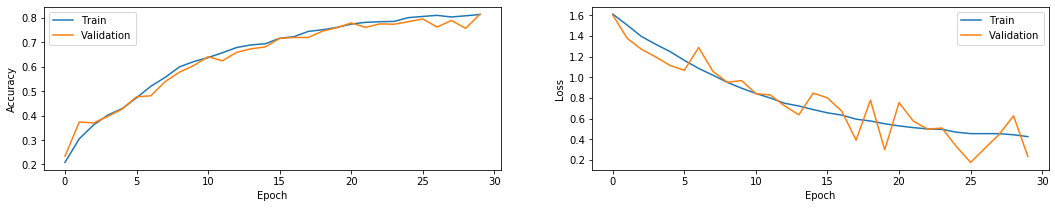

In [80]:
plot_loss(history)

In [87]:
model2 = build_cnn_2()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 28, 28, 32)        896       
_________________________________________________________________
batch_normalization_7 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 26, 26, 32)        9248      
_________________________________________________________________
batch_normalization_8 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 64)       

In [88]:
history2 = model2.fit_generator(
    generators['training'],
    epochs = 30,
    steps_per_epoch = generators['training'].samples // generators['training'].batch_size,
    validation_data = generators['validation'],
    validation_steps = generators['validation'].samples // generators['validation'].batch_size
)

Epoch 1/30
300/300 [==============================] - 49s 163ms/step - loss: 2.2616 - accuracy: 0.1989 - val_loss: 1.9204 - val_accuracy: 0.2020
Epoch 2/30
300/300 [==============================] - 47s 158ms/step - loss: 1.8152 - accuracy: 0.2174 - val_loss: 1.6304 - val_accuracy: 0.2036
Epoch 3/30
300/300 [==============================] - 54s 179ms/step - loss: 1.6366 - accuracy: 0.2587 - val_loss: 1.3818 - val_accuracy: 0.2861
Epoch 4/30
300/300 [==============================] - 48s 159ms/step - loss: 1.5014 - accuracy: 0.3093 - val_loss: 1.6406 - val_accuracy: 0.3157
Epoch 5/30
300/300 [==============================] - 47s 156ms/step - loss: 1.4625 - accuracy: 0.3367 - val_loss: 1.3690 - val_accuracy: 0.3544
Epoch 6/30
300/300 [==============================] - 49s 164ms/step - loss: 1.4281 - accuracy: 0.3517 - val_loss: 1.5690 - val_accuracy: 0.2784
Epoch 7/30
300/300 [==============================] - 54s 180ms/step - loss: 1.4135 - accuracy: 0.3568 - val_loss: 1.2905 - val_ac

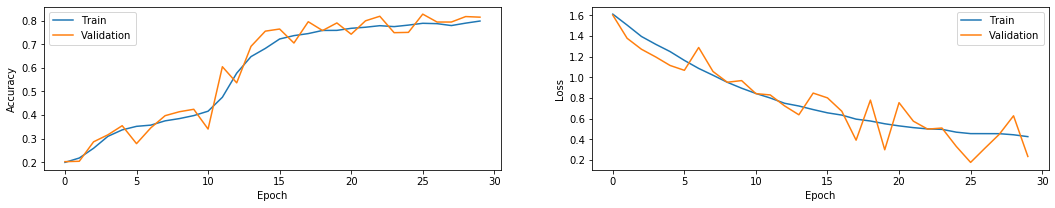

In [89]:
plot_loss(history2)

In [1]:
import time
start_time = time.time()
import os
import numpy as np
from keras import optimizers
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import adam
from keras import models
import cv2
import dlib
import pandas as pd
import matplotlib.pyplot as plt
import sys
import time 
import progressbar
from tqdm.notebook import tqdm_notebook

Using TensorFlow backend.


In [2]:
from sklearn import svm, datasets
from sklearn.dummy import DummyClassifier
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, ShuffleSplit
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, precision_score, f1_score

In [3]:
from tensorflow.python.keras.applications.vgg16 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras.callbacks import EarlyStopping, ModelCheckpoint

In [4]:
os.getcwd()

'C:\\Users\\User\\Desktop\\4th_year_AMLS\\AMLS_19-20_ChinYangTan_16053203\\Project_AMLS_19-20_16053203\\Notebook\\B2'

In [5]:
df = pd.read_csv('../../Dataset_original_AMLS_19-20/cartoon_set/labels.csv', sep = '\t')
df = df.drop(columns = [df.columns[0]]).drop(columns = [df.columns[2]])
df['eye_color'] = df['eye_color'].apply(str)
df

eye_color file_name
0            1     0.png
1            2     1.png
2            2     2.png
3            2     3.png
4            0     4.png
...        ...       ...
9995         3  9995.png
9996         0  9996.png
9997         1  9997.png
9998         0  9998.png
9999         2  9999.png

[10000 rows x 2 columns]

In [25]:
img = ('../../Dataset_original_AMLS_19-20/cartoon_set/img')
# training, testing = train_test_split(df, random_state=0)
training, validating = np.split(df.sample(frac=1), [int(0.9*len(df)),]) #splitting at n-array
# print(training, validating, testing)
# print(training)

In [32]:
# set up data generator
data_generator = ImageDataGenerator(
    rescale = 1./255.,
    validation_split = 0.2,
    horizontal_flip=True,
    vertical_flip=True   
)

# # get batches of training images from the df
# train_generator = data_generator.flow_from_dataframe(
#         dataframe=train_set,
#         x_col="file_name",
#         y_col="face_shape",
#         target_size=(178, 218),
#         batch_size=12,
#         class_mode='categorical')

# validate_generator = data_generator.flow_from_dataframe(
#         dataframe=train_set,
#         x_col="file_name",
#         y_col="face_shape",
#         target_size=(178, 218),
#         batch_size=12,
#         class_mode='categorical')

# Get batches of training dataset from the dataframe
print("Training Dataset Preparation: ")
train_generator = data_generator.flow_from_dataframe(
        dataframe = training, directory = img ,
        x_col = "file_name", y_col = "eye_color",
        class_mode = 'categorical', target_size = (30,30),
        batch_size = 24, subset = 'training') 
   
# Get batches of validation dataset from the dataframe
print("\nValidation Dataset Preparation: ")
validation_generator = data_generator.flow_from_dataframe(
        dataframe = validating, directory = img ,
        x_col = "file_name", y_col = "eye_color",
        class_mode = 'categorical', target_size = (30,30),
        batch_size = 24, subset = 'training')

Training Dataset Preparation: 
Found 7200 validated image filenames belonging to 5 classes.

Validation Dataset Preparation: 
Found 800 validated image filenames belonging to 5 classes.


In [33]:
#put under a def

In [88]:
# starting point 
my_model= models.Sequential()

# Add first convolutional block
my_model.add(Conv2D(8, (3, 3), activation='relu', padding='same', 
                    input_shape=(30,30,3))) #height, width, depth
my_model.add(MaxPooling2D((2, 2), padding='same'))
# second block
my_model.add(Conv2D(16, (3, 3), activation='relu', padding='same')) #Convolution: filters, kernel_size that specifies the height and width of the 2D convolution window, p padding layers so dimensions of input = output
my_model.add(MaxPooling2D((2, 2), padding='same'))
# third block
my_model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# fourth block
my_model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
my_model.add(MaxPooling2D((2, 2), padding='same'))
# global average pooling
# my_model.add(GlobalAveragePooling2D())
# fully connected layer
# my_model.add(Dense(64, activation='relu'))
# my_model.add(BatchNormalization())
# make predictions
my_model.add(Flatten())
my_model.add(Dense(5, activation='softmax'))
# Show a summary of the model. Check the number of trainable parameters
my_model.summary()
my_model.compile(optimizer='adam', loss='categorical_crossentropy', 
                 metrics=['accuracy'])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 8)         224       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 15, 15, 8)         0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 15, 15, 16)        1168      
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 8, 8, 16)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 8, 8, 32)          4640      
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 4, 4, 64)         

In [89]:
#copy in main function

In [90]:
history = my_model.fit_generator(
                                train_generator,
                                epochs=100,
                                steps_per_epoch=train_generator.samples // train_generator.batch_size,
                                validation_data=validation_generator,
                                validation_steps=validation_generator.samples // validation_generator.batch_size
                                )

Epoch 1/100
300/300 [==============================] - 67s 224ms/step - loss: 1.6109 - accuracy: 0.2056 - val_loss: 1.6130 - val_accuracy: 0.2184
Epoch 2/100
300/300 [==============================] - 66s 219ms/step - loss: 1.5967 - accuracy: 0.2286 - val_loss: 1.5800 - val_accuracy: 0.2771
Epoch 3/100
300/300 [==============================] - 65s 216ms/step - loss: 1.4319 - accuracy: 0.3506 - val_loss: 1.4292 - val_accuracy: 0.3750
Epoch 4/100
300/300 [==============================] - 65s 216ms/step - loss: 1.2252 - accuracy: 0.4803 - val_loss: 1.0776 - val_accuracy: 0.5064
Epoch 5/100
300/300 [==============================] - 65s 217ms/step - loss: 0.9787 - accuracy: 0.6036 - val_loss: 0.8965 - val_accuracy: 0.6134
Epoch 6/100
300/300 [==============================] - 67s 222ms/step - loss: 0.8600 - accuracy: 0.6467 - val_loss: 0.9081 - val_accuracy: 0.6327
Epoch 7/100
300/300 [==============================] - 65s 218ms/step - loss: 0.7951 - accuracy: 0.6737 - val_loss: 0.6734 -

Epoch 57/100
300/300 [==============================] - 65s 218ms/step - loss: 0.3372 - accuracy: 0.8612 - val_loss: 0.2896 - val_accuracy: 0.8093
Epoch 58/100
300/300 [==============================] - 66s 219ms/step - loss: 0.3353 - accuracy: 0.8642 - val_loss: 0.8466 - val_accuracy: 0.7822
Epoch 59/100
300/300 [==============================] - 65s 218ms/step - loss: 0.3237 - accuracy: 0.8656 - val_loss: 0.3218 - val_accuracy: 0.7925
Epoch 60/100
300/300 [==============================] - 64s 214ms/step - loss: 0.3297 - accuracy: 0.8646 - val_loss: 0.3936 - val_accuracy: 0.8041
Epoch 61/100
300/300 [==============================] - 64s 214ms/step - loss: 0.3210 - accuracy: 0.8665 - val_loss: 0.8664 - val_accuracy: 0.7912
Epoch 62/100
300/300 [==============================] - 64s 215ms/step - loss: 0.3213 - accuracy: 0.8671 - val_loss: 0.5631 - val_accuracy: 0.7835
Epoch 63/100
300/300 [==============================] - 65s 215ms/step - loss: 0.3277 - accuracy: 0.8669 - val_loss: 0

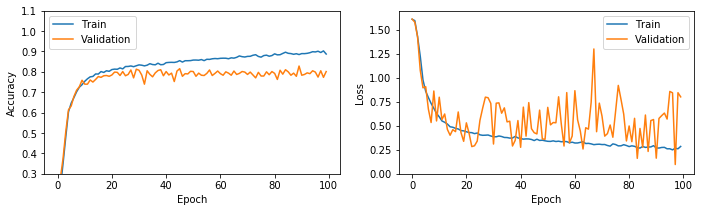

In [91]:
plt.figure(figsize=(18, 3))

plt.subplot(131)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim([.3,1.1])
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(132)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylim([0,1.7])
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='best')

plt.savefig("Custom_Keras_ODSC.png", dpi=300)

In [92]:
from keras.models import load_model

modelFile = 'my_CNN.h5'

my_model.save(modelFile)

In [93]:
df2 = pd.read_csv('../../Dataset_test_AMLS_19-20/cartoon_set_test/labels.csv', sep = '\t')
df2 = df2.drop(columns = [df2.columns[0]]).drop(columns = [df2.columns[2]])
df2['eye_color'] = df2['eye_color'].apply(str)
df2

eye_color file_name
0            2     0.png
1            1     1.png
2            0     2.png
3            0     3.png
4            3     4.png
...        ...       ...
2495         4  2495.png
2496         2  2496.png
2497         2  2497.png
2498         4  2498.png
2499         3  2499.png

[2500 rows x 2 columns]

In [94]:
img = ('../../Dataset_test_AMLS_19-20/cartoon_set_test/img')

In [95]:
# saved_model = load_model(modelFile)
# test_generator = data_generator.flow_from_dataframe(
#         dataframe = testing, directory = img,
#         x_col = "file_name", y_col = "eye_color",
#         batch_size=1,
#         class_mode='categorical', target_size=(30, 30),
#         shuffle=False)
# test_steps = test_generator.samples
# print(test_steps)

saved_model = load_model(modelFile)
test_generator = data_generator.flow_from_dataframe(
        dataframe = df2, directory = img,
        x_col = "file_name", y_col = "eye_color",
        batch_size=1,
        class_mode='categorical', target_size=(30, 30),
        shuffle=False)
test_steps = test_generator.samples
print(test_steps)

Found 2500 validated image filenames belonging to 5 classes.
2500


In [96]:
#convert to .py file
#calling .py file
#doesn't have to show results
#import x
#from x import *

In [97]:
test_generator.reset()
pred=saved_model.predict_generator(test_generator, verbose=1, steps=test_steps)
# determine the maximum activation value for each sample
predicted_class_indices=np.argmax(pred,axis=1)
# print(predicted_class_indices)
# label each predicted value to correct gender
labels = (test_generator.class_indices)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]

2500/2500 [==============================] - 11s 5ms/step


In [98]:
import sklearn.metrics as metrics

In [99]:
#paste plt.show()

[[407  19  15  23  42]
 [ 22 392  18  30  21]
 [ 48  23 406  20  28]
 [ 21  38  23 391  41]
 [ 32  17   7  25 391]]

Confusion Matrix


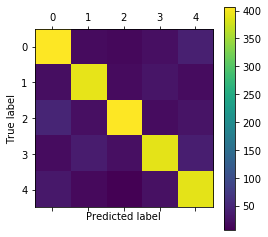

[[0.1628 0.0076 0.006  0.0092 0.0168]
 [0.0088 0.1568 0.0072 0.012  0.0084]
 [0.0192 0.0092 0.1624 0.008  0.0112]
 [0.0084 0.0152 0.0092 0.1564 0.0164]
 [0.0128 0.0068 0.0028 0.01   0.1564]]

Confusion Matrix (normalised)


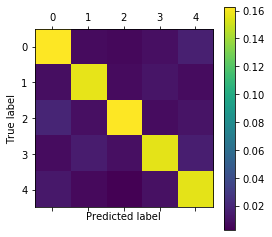

Classification Report

              precision    recall  f1-score   support

           0       0.77      0.80      0.79       506
           1       0.80      0.81      0.81       483
           2       0.87      0.77      0.82       525
           3       0.80      0.76      0.78       514
           4       0.75      0.83      0.79       472

    accuracy                           0.79      2500
   macro avg       0.80      0.80      0.79      2500
weighted avg       0.80      0.79      0.80      2500

Accuracy achieved: 0.7948 ♡♡♡


In [100]:
cm = confusion_matrix(test_generator.classes, predicted_class_indices)

print(cm)
plt.matshow(cm)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix')
plt.show()


cm2 = confusion_matrix(test_generator.classes, predicted_class_indices, normalize='all')

print(cm2)
plt.matshow(cm2)
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
print('\nConfusion Matrix (normalised)')
plt.show()

print('Classification Report\n')
print(classification_report(test_generator.classes, predicted_class_indices))
print('Accuracy achieved:', accuracy_score(test_generator.classes, predicted_class_indices), '\u2661''\u2661''\u2661')

In [101]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 60021.318823337555 seconds ---
